In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob

METADATA_DIR = "data/fma_metadata/"

dir_names = glob.glob(f"{METADATA_DIR}*.csv")
csv_names = [name.split("/")[-1] for name in dir_names]
print(csv_names)

['raw_artists.csv', 'genres.csv', 'raw_albums.csv', 'raw_genres.csv', 'raw_tracks.csv', 'echonest.csv', 'raw_echonest.csv', 'features.csv', 'tracks.csv']


## Structure of Data
* Only the following `.csv` files are relevant: `genres`, `tracks`, `echonest` and `features` 
* `tracks.csv` contains data of the album, artist and track
* `echonest.csv` contains key features of a track described by:
    * acousticness, danceability, energy, instrumentalness, liveness, speechiness, tempo, valence
    * temporal features obtained through the method by Schindler & Rauber (2012)
    * the track's popularity and ranking
* `features.csv` contains features calculated by using the `librosa` library:
    * `chroma_cens`, `chroma_cqt`, `chroma_stft`, `mfcc`, `tonnetz`, `zcr`, `rmse`
    * `spectral_bandwidth`, `spectral_centroid`, `spectral_contrast`, `spectral_rolloff`
    * all containing the `kurtosis`, `max`, `min`, `mean`, `median`, `skew`, `std`

In [2]:
genres = pd.read_csv(f"{METADATA_DIR}genres.csv", index_col=0)
print(f"genres.csv, shape: {str(genres.shape)}")
genres.head(5)

genres.csv, shape: (163, 4)


,#tracks,parent,title,top_level
genre_id,,,,
1,8693,38,Avant-Garde,38
2,5271,0,International,2
3,1752,0,Blues,3
4,4126,0,Jazz,4
5,4106,0,Classical,5


In [3]:
tracks = pd.read_csv(f"{METADATA_DIR}tracks.csv", index_col=0, header=[0, 1])
print(f"tracks.csv, shape: {str(tracks.shape)}")
tracks.head(5)

tracks.csv, shape: (106574, 52)


album                                                     \
         comments         date_created        date_released engineer   
track_id                                                               
2               0  2008-11-26 01:44:45  2009-01-05 00:00:00      NaN   
3               0  2008-11-26 01:44:45  2009-01-05 00:00:00      NaN   
5               0  2008-11-26 01:44:45  2009-01-05 00:00:00      NaN   
10              0  2008-11-26 01:45:08  2008-02-06 00:00:00      NaN   
20              0  2008-11-26 01:45:05  2009-01-06 00:00:00      NaN   

                                                                          \
         favorites id                                information listens   
track_id                                                                   
2                4  1                                    <p></p>    6073   
3                4  1                                    <p></p>    6073   
5                4  1                                    <p></p>    6073   
10               4  6                                        NaN   47632   
20               2  4  <p> "spiritual songs" from Nicky Cook</p>    2710   

                        ...       track                         \
         producer tags  ... information interest language_code   
track_id                ...                                      
2             NaN   []  ...         NaN     4656            en   
3             NaN   []  ...         NaN     1470            en   
5             NaN   []  ...         NaN     1933            en   
10            NaN   []  ...         NaN    54881            en   
20            NaN   []  ...         NaN      978            en   

                                                                              \
                                                    license listens lyricist   
track_id                                                                       
2         Attribution-NonCommercial-ShareAlike 3.0 Inter...    1293      NaN   
3         Attribution-NonCommercial-ShareAlike 3.0 Inter...     514      NaN   
5         Attribution-NonCommercial-ShareAlike 3.0 Inter...    1151      NaN   
10        Attribution-NonCommercial-NoDerivatives (aka M...   50135      NaN   
20        Attribution-NonCommercial-NoDerivatives (aka M...     361      NaN   

                                                 
         number publisher tags            title  
track_id                                         
2             3       NaN   []             Food  
3             4       NaN   []     Electric Ave  
5             6       NaN   []       This World  
10            1       NaN   []          Freeway  
20            3       NaN   []  Spiritual Level  

[5 rows x 52 columns]

In [4]:
echonest = pd.read_csv(f"{METADATA_DIR}echonest.csv", index_col=0, header=[0, 1, 2])
print(f"echonest.csv, shape: {str(echonest.shape)}")
echonest.head(5)

echonest.csv, shape: (13129, 249)


echonest                                                    \
         audio_features                                                     
           acousticness danceability    energy instrumentalness  liveness   
track_id                                                                    
2              0.416675     0.675894  0.634476         0.010628  0.177647   
3              0.374408     0.528643  0.817461         0.001851  0.105880   
5              0.043567     0.745566  0.701470         0.000697  0.373143   
10             0.951670     0.658179  0.924525         0.965427  0.115474   
134            0.452217     0.513238  0.560410         0.019443  0.096567   

                                                                        ...  \
                                           metadata                     ...   
         speechiness    tempo   valence  album_date         album_name  ...   
track_id                                                                ...   
2           0.159310  165.922  0.576661         NaN                NaN  ...   
3           0.461818  126.957  0.269240         NaN                NaN  ...   
5           0.124595  100.260  0.621661         NaN                NaN  ...   
10          0.032985  111.562  0.963590  2008-03-11  Constant Hitmaker  ...   
134         0.525519  114.290  0.894072         NaN                NaN  ...   

                                                                              \
         temporal_features                                                     
                       214        215       216       217       218      219   
track_id                                                                       
2                -1.992303   6.805694  0.233070  0.192880  0.027455  0.06408   
3                -1.582331   8.889308  0.258464  0.220905  0.081368  0.06413   
5                -2.288358  11.527109  0.256821  0.237820  0.060122  0.06014   
10               -3.662988  21.508228  0.283352  0.267070  0.125704  0.08082   
134              -1.452696   2.356398  0.234686  0.199550  0.149332  0.06440   

                                                     
                                                     
               220       221        222         223  
track_id                                             
2          3.67696   3.61288  13.316690  262.929749  
3          6.08277   6.01864  16.673548  325.581085  
5          5.92649   5.86635  16.013849  356.755737  
10         8.41401   8.33319  21.317064  483.403809  
134       11.26707  11.20267  26.454180  751.147705  

[5 rows x 249 columns]

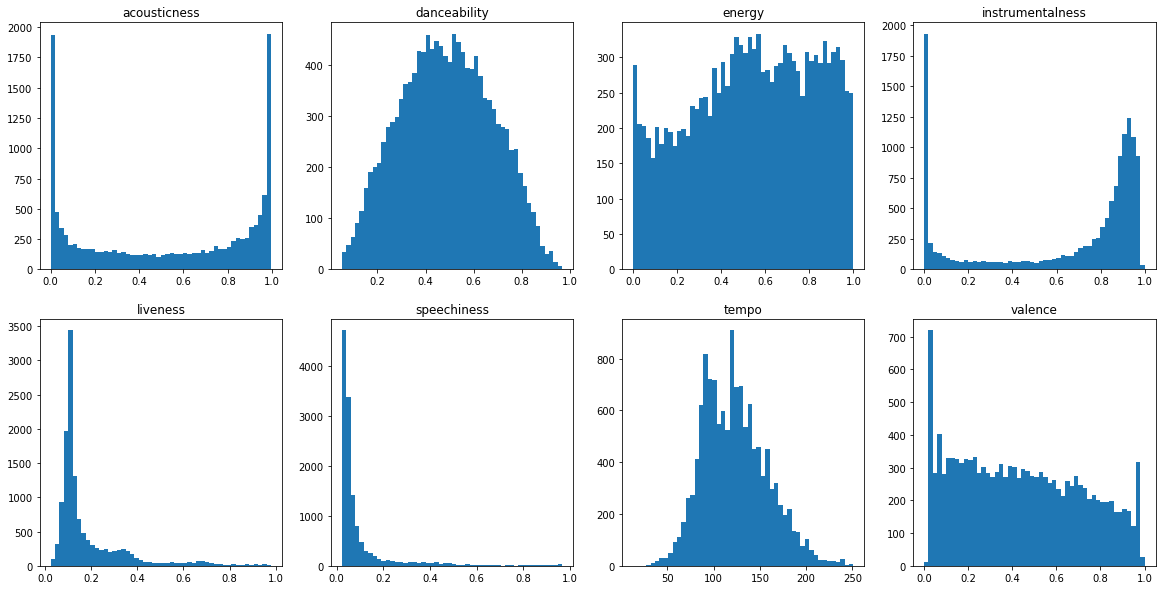

In [51]:
fig, axs = plt.subplots(2, 4, figsize=(20, 10))

audio_features = [tup[2] for tup in echonest.columns.tolist() if tup[1] == "audio_features"]
for idx, feature in enumerate(audio_features):
    axs[int(idx / 4)][idx % 4].hist(echonest[("echonest", "audio_features", feature)], bins=50)
    axs[int(idx / 4)][idx % 4].set_title(feature)

plt.show()

In [5]:
features = pd.read_csv(f"{METADATA_DIR}features.csv", index_col=0, header=[0, 1, 2])
print(f"features.csv, shape: {str(features.shape)}")
features.head(5)

features.csv, shape: (106574, 518)


feature    chroma_cens                                                    \
statistics    kurtosis                                                     
number              01        02        03        04        05        06   
track_id                                                                   
2             7.180653  5.230309  0.249321  1.347620  1.482478  0.531371   
3             1.888963  0.760539  0.345297  2.295201  1.654031  0.067592   
5             0.527563 -0.077654 -0.279610  0.685883  1.937570  0.880839   
10            3.702245 -0.291193  2.196742 -0.234449  1.367364  0.998411   
20           -0.193837 -0.198527  0.201546  0.258556  0.775204  0.084794   

feature                                             ...   tonnetz            \
statistics                                          ...       std             
number            07        08        09        10  ...        04        05   
track_id                                            ...                       
2           1.481593  2.691455  0.866868  1.341231  ...  0.054125  0.012226   
3           1.366848  1.054094  0.108103  0.619185  ...  0.063831  0.014212   
5          -0.923192 -0.927232  0.666617  1.038546  ...  0.040730  0.012691   
10          1.770694  1.604566  0.521217  1.982386  ...  0.074358  0.017952   
20         -0.289294 -0.816410  0.043851 -0.804761  ...  0.095003  0.022492   

feature                     zcr                                          \
statistics             kurtosis       max      mean    median       min   
number            06         01        01        01        01        01   
track_id                                                                  
2           0.012111   5.758890  0.459473  0.085629  0.071289  0.000000   
3           0.017740   2.824694  0.466309  0.084578  0.063965  0.000000   
5           0.014759   6.808415  0.375000  0.053114  0.041504  0.000000   
10          0.013921  21.434212  0.452148  0.077515  0.071777  0.000000   
20          0.021355  16.669037  0.469727  0.047225  0.040039  0.000977   

feature                         
statistics      skew       std  
number            01        01  
track_id                        
2           2.089872  0.061448  
3           1.716724  0.069330  
5           2.193303  0.044861  
10          3.542325  0.040800  
20          3.189831  0.030993  

[5 rows x 518 columns]


## Understanding Features

* **Chroma** refers to the twelve semitones/pitch classes in an octave
* **Constant-Q Transform (CQT)** is a type of Discrete Fourier Transform that produces a logarithmic frequency space. It is more suitable in music as it replicates a human's auditory system, where the frequency resolution at high frequencies is lower than at low frequencies.
* `chroma_cqt` obtains the (average or sum?) amplitude of a particular chroma across all octaves at a particular time window. `chroma_cens` is a function of `chroma_cqt`, and is described to be the *Energy Normalised* chroma.
* `chroma_stft` calculates the **Short Time Fourier Transform (STFT)** of the track, and bin them into chromas. (Note that binning into chromas creates a chromagram)
* `mfcc` is the **Mel-frequency Cepstral Coefficients**. This coefficients are obtained through the following steps: Take the FT of a windowed signal, 
 convert linear into mel scale and take the log, take the consine transform of the log powers, the amplitudes are the coefficients.
* `tonnetz` is described to be a 2d lattice diagram that represents tonal space, that is used to visualise chords and harmonic relationships. Assume that in this case, this values returned are a way to quantify this.
* `zcr` (zero crossing rate) is the number of times the time series data crosses zero.
* `rmse` is the root mean square of the energy, calculated through the STFT.
* `spectral_bandwidth`, `spectral_centroid`, `spectral_contrast`, `spectral_rolloff` all relates to the frequency spectrum obtained from a STFT.


### Plotting the Features of a Track

/home/yijerloh/.pyenv/versions/anaconda3-2020.02/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


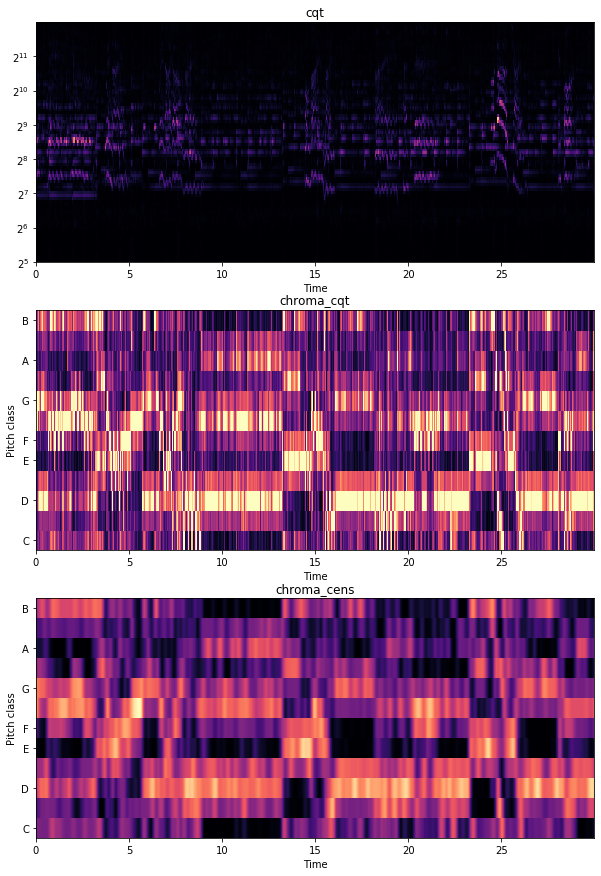

In [6]:
import librosa, librosa.display
import numpy as np

x, sr = librosa.load("data/fma_small/000/000211.mp3", sr=None)

cqt = np.abs(librosa.cqt(x, sr=sr, hop_length=512, bins_per_octave=12, n_bins=7 * 12))
chroma_cqt = librosa.feature.chroma_cqt(C=cqt, n_chroma=12, n_octaves=7)
chroma_cens = librosa.feature.chroma_cens(C=cqt, n_chroma=12, n_octaves=7)

plt.figure(figsize=(10, 15))
plt.subplot(3, 1, 1)
librosa.display.specshow(cqt, sr=sr, x_axis='time', y_axis='cqt')
plt.title("cqt")
plt.subplot(3, 1, 2)
librosa.display.specshow(chroma_cqt, sr=sr, x_axis='time', y_axis='chroma')
plt.title("chroma_cqt")
plt.subplot(3, 1, 3)
librosa.display.specshow(chroma_cens, sr=sr, x_axis='time', y_axis='chroma')
plt.title("chroma_cens")

plt.show()


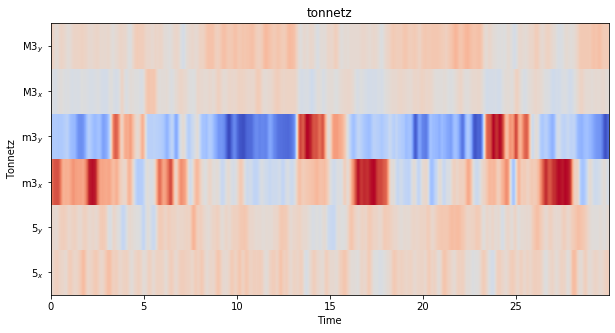

In [15]:
tonnetz = librosa.feature.tonnetz(chroma=chroma_cens)

plt.figure(figsize=(10, 5))
plt.subplot(1, 1, 1)
librosa.display.specshow(tonnetz, sr=sr, x_axis='time', y_axis='tonnetz')
plt.title("tonnetz")
plt.show()

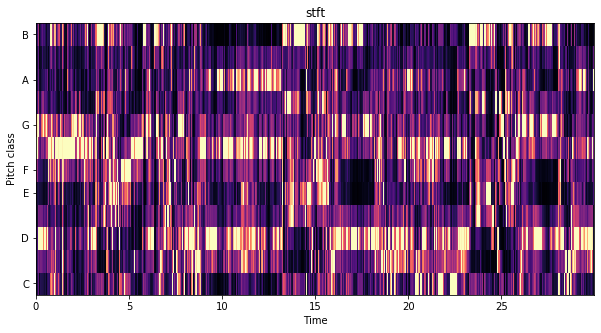

In [16]:
stft = np.abs(librosa.stft(x, n_fft=2048, hop_length=512))
chroma_stft = librosa.feature.chroma_stft(S=stft**2, n_chroma=12)
plt.figure(figsize=(10, 5))
plt.subplot(1, 1, 1)
librosa.display.specshow(chroma_stft, sr=sr, x_axis='time', y_axis='chroma')
plt.title("stft")
plt.show()

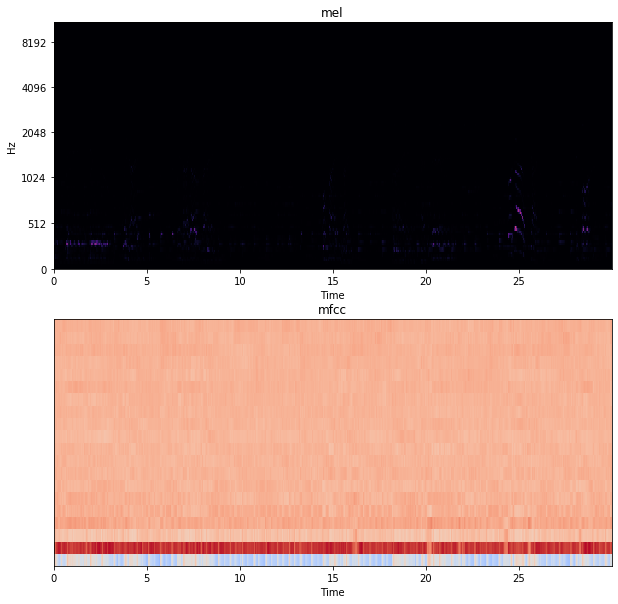

In [17]:
mel = librosa.feature.melspectrogram(sr=sr, S=stft**2)
mfcc = librosa.feature.mfcc(S=librosa.power_to_db(mel), n_mfcc=20)

plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
librosa.display.specshow(mel, sr=sr, x_axis='time', y_axis='mel')
plt.title("mel")
plt.subplot(2, 1, 2)
librosa.display.specshow(mfcc, sr=sr, x_axis='time')
plt.title("mfcc")
plt.show()